In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [2]:
# Levanto dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
# Creo una función para generar todas las medidas de interes 

def CalculaMetricas(variable):

    media = variable.mean()
    mediana = variable.median()
    media_recortada = scipy.stats.trim_mean(variable,0.1)
    varianza = variable.var()
    desvio = variable.std()
    primer_cuartil = variable.quantile(0.25)
    tercer_cuartil = variable.quantile(0.75)
    percentil_1 = variable.quantile(0.01)
    percentil_99 = variable.quantile(0.99)
    error_estandar = scipy.stats.sem(variable) 
    cv = scipy.stats.variation(variable)
    asimetria = scipy.stats.skew(variable) 
    curtosis = scipy.stats.kurtosis(variable)    
    
    resultado = (
        f'Medidas de Tendencia Central\n'
        f'Media: {round(media, 0)}\n'
        f'Media Recortada: {round(media_recortada, 0)}\n'
        f'Mediana: {round(mediana, 0)}\n\n'
        f'Medidas de Localización\n'
        f'Primer Cuartil: {round(primer_cuartil, 0)}\n'
        f'Tercer Cuartil: {round(tercer_cuartil, 0)}\n'
        f'Percentil 1: {round(percentil_1, 0)}\n'
        f'Percentil 99: {round(percentil_99, 0)}\n\n'
        f'Medidas de Dispersión Absolutas\n'
        f'Varianza: {round(varianza, 0)}\n'
        f'Desvío Estándar: {round(desvio, 0)}\n'
        f'Rango Intercuartílico: {round(tercer_cuartil - primer_cuartil, 0)}\n'
        f'Error Estándar: {round(error_estandar, 0)}\n\n'
        f'Medidas de Dispersión Relativas\n'
        f'Coeficiente de Variación: {round(cv, 2)}\n'
        f'Desvío Intercuartílico: {round((tercer_cuartil - primer_cuartil) / (tercer_cuartil + primer_cuartil), 2)}\n\n'
        f'Medidas de Asimetría y Curtosis\n'
        f'Coeficiente de Asimetría: {round(asimetria, 2)}\n'
        f'Coeficiente de Curtosis: {round(curtosis, 2)}'
    )

    print(resultado)
    

# LotArea


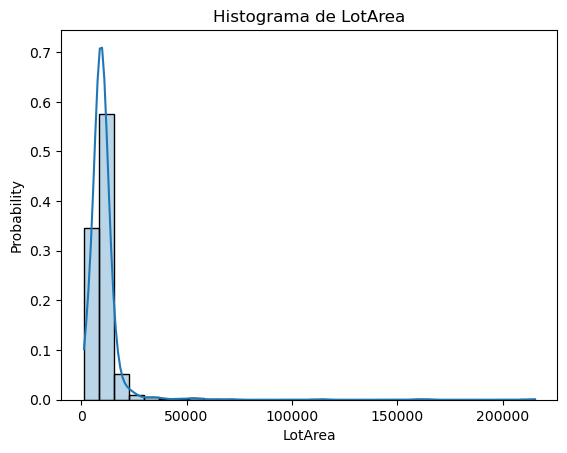

In [4]:
# Histograma con curva de densidad 
sns.histplot(df['LotArea'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de LotArea')
plt.show()

In [5]:
CalculaMetricas(df['LotArea'])

Medidas de Tendencia Central
Media: 10517.0
Media Recortada: 9563.0
Mediana: 9478.0

Medidas de Localización
Primer Cuartil: 7554.0
Tercer Cuartil: 11602.0
Percentil 1: 1680.0
Percentil 99: 37568.0

Medidas de Dispersión Absolutas
Varianza: 99625650.0
Desvío Estándar: 9981.0
Rango Intercuartílico: 4048.0
Error Estándar: 261.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.95
Desvío Intercuartílico: 0.21

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 12.2
Coeficiente de Curtosis: 202.54


# LotArea_LOG

In [6]:
# Primero la voy a topear por exceso de outliers
percentil_99 = df['LotArea'].quantile(0.99)
percentil_1 = df['LotArea'].quantile(0.01)
df['LotArea_LOG'] = np.log(np.where(df['LotArea'] > percentil_99,
                                    percentil_99,
                                    np.where(df['LotArea'] < percentil_1,
                                             percentil_1,
                                             df['LotArea'])))

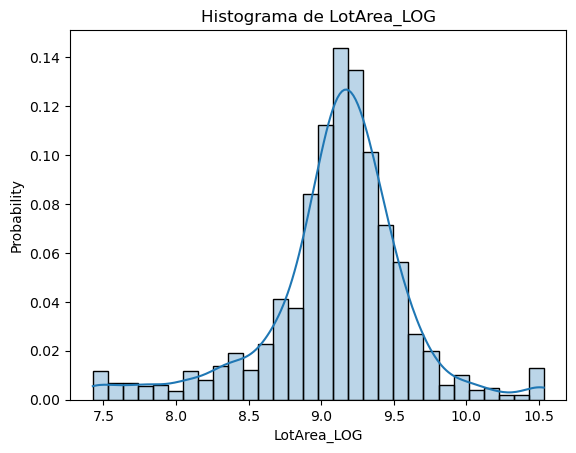

In [7]:
# Histograma 
sns.histplot(df['LotArea_LOG'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de LotArea_LOG')
plt.show()

In [8]:
CalculaMetricas(df['LotArea_LOG'])

Medidas de Tendencia Central
Media: 9.0
Media Recortada: 9.0
Mediana: 9.0

Medidas de Localización
Primer Cuartil: 9.0
Tercer Cuartil: 9.0
Percentil 1: 7.0
Percentil 99: 11.0

Medidas de Dispersión Absolutas
Varianza: 0.0
Desvío Estándar: 0.0
Rango Intercuartílico: 0.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.05
Desvío Intercuartílico: 0.02

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: -0.73
Coeficiente de Curtosis: 2.41


# GrLivArea

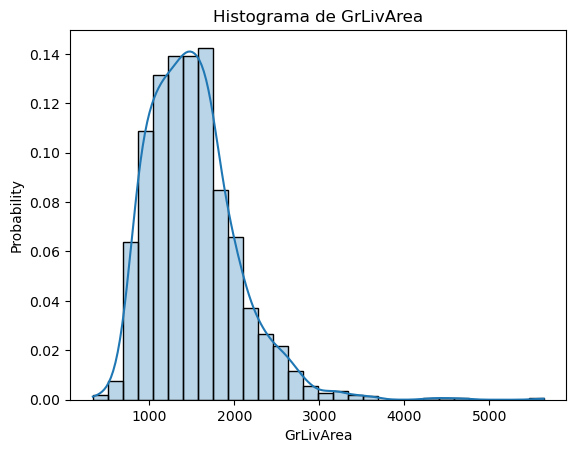

In [9]:
# Histograma 
sns.histplot(df['GrLivArea'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de GrLivArea')
plt.show()

In [10]:
CalculaMetricas(df['GrLivArea'])

Medidas de Tendencia Central
Media: 1515.0
Media Recortada: 1468.0
Mediana: 1464.0

Medidas de Localización
Primer Cuartil: 1130.0
Tercer Cuartil: 1777.0
Percentil 1: 692.0
Percentil 99: 3123.0

Medidas de Dispersión Absolutas
Varianza: 276130.0
Desvío Estándar: 525.0
Rango Intercuartílico: 647.0
Error Estándar: 14.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.35
Desvío Intercuartílico: 0.22

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 1.37
Coeficiente de Curtosis: 4.87


# GrLivArea_LOG

In [11]:
df['GrLivArea_LOG'] = np.log( df['GrLivArea'])

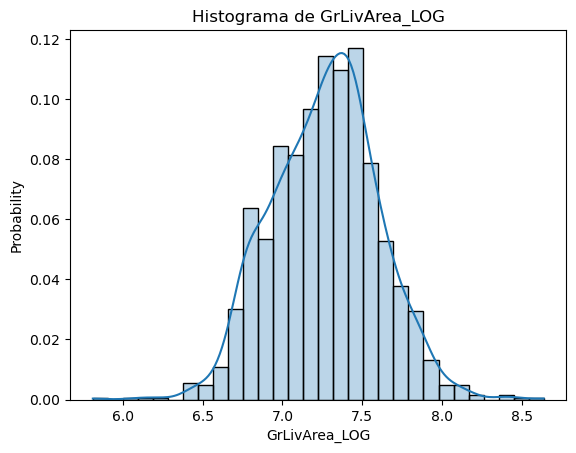

In [12]:
# Histograma 
sns.histplot(df['GrLivArea_LOG'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de GrLivArea_LOG')
plt.show()

In [13]:
CalculaMetricas(df['GrLivArea_LOG'])

Medidas de Tendencia Central
Media: 7.0
Media Recortada: 7.0
Mediana: 7.0

Medidas de Localización
Primer Cuartil: 7.0
Tercer Cuartil: 7.0
Percentil 1: 7.0
Percentil 99: 8.0

Medidas de Dispersión Absolutas
Varianza: 0.0
Desvío Estándar: 0.0
Rango Intercuartílico: 0.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.05
Desvío Intercuartílico: 0.03

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: -0.01
Coeficiente de Curtosis: 0.28


# Target

In [14]:
# Primero genero la variable logaritmica 
df['SalePrice_Log'] = np.log(df['SalePrice'])

# Modelos

In [15]:
# Separo usando el paquete sklearn
df_train,df_test = train_test_split(df,
                                    test_size = 0.3, #Porcentaje de muestra test 
                                    random_state = 42) #Semilla

# Modelo 1: Sin Logaritmos en Features

In [16]:
# Ajusto el modelo
features_base = ['LotArea', 'GrLivArea']
model_formula = 'SalePrice_Log ~ ' + ' + '.join(df_train[features_base].columns)
lm1 = sm.ols(formula = model_formula, data = df_train).fit()

coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))

pvalores_1 = lm1.pvalues
print('P-Valores:')
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

Coeficientes:
Intercept    11.249170
LotArea       0.000003
GrLivArea     0.000490
dtype: float64
P-Valores:
LotArea      0.000597
Intercept    0.000000
GrLivArea    0.000000
dtype: float64


In [17]:
# Genero columna de predicciones
df_train['Pred_1'] = lm1.predict(df_train)
df_test['Pred_1'] = lm1.predict(df_test)

# Modelo 2: Con Logaritmo en Features

In [18]:
# Ajusto el modelo
features_base = ['LotArea_LOG', 'GrLivArea_LOG']
model_formula = 'SalePrice_Log ~ ' + ' + '.join(df_train[features_base].columns)
lm2 = sm.ols(formula = model_formula, data = df_train).fit()

coeficientes = lm2.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))

pvalores_1 = lm2.pvalues
print('P-Valores:')
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

Coeficientes:
Intercept        5.239684
LotArea_LOG      0.121245
GrLivArea_LOG    0.781130
dtype: float64
P-Valores:
Intercept        0.0
LotArea_LOG      0.0
GrLivArea_LOG    0.0
dtype: float64


In [19]:
# Genero columna de predicciones
df_train['Pred_2'] = lm2.predict(df_train)
df_test['Pred_2'] = lm2.predict(df_test)

# Modelo 1 vs Modelo 2

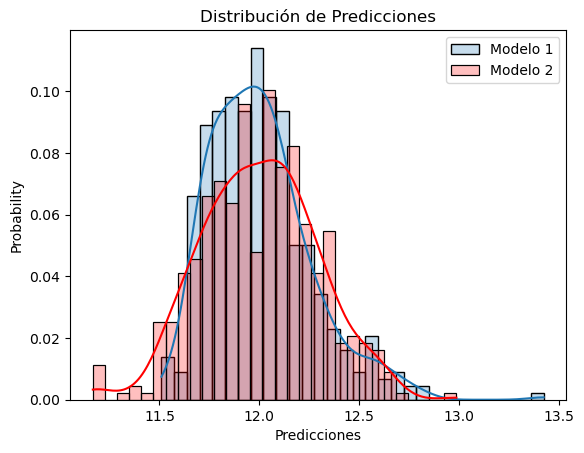

In [20]:
plt.figure()
# Histograma
sns.histplot(data = df_test,
             x = 'Pred_1',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            label = 'Modelo 1')
sns.histplot(data  = df_test, 
             x = 'Pred_2', 
             bins = 30, 
             alpha = 0.25, 
             kde = True, 
             stat='probability', 
             color='red', 
             label='Modelo 2')
plt.title('Distribución de Predicciones')
plt.xlabel('Predicciones')
plt.legend()
plt.show()

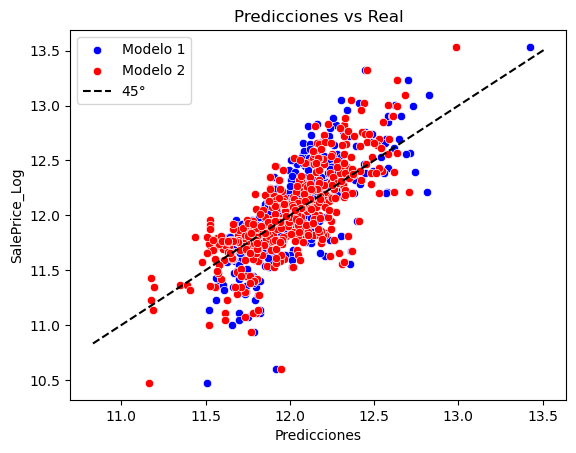

In [21]:
plt.figure()
sns.scatterplot(data = df_test,
                x = 'Pred_1',
                y = 'SalePrice_Log',
                color = 'blue',
               label = 'Modelo 1')
sns.scatterplot(data = df_test,
                x = 'Pred_2',
                y = 'SalePrice_Log',
                color = 'red',
               label = 'Modelo 2')
minimo = df_test['Pred_2'].min()
maximo = df_test['Pred_2'].max()
linea_45_grados = np.linspace(minimo*0.97, maximo*1.04, 100)  
plt.plot(linea_45_grados, linea_45_grados, 
         color='black', linestyle='--', label='45°')  # Trazar la línea
plt.title('Predicciones vs Real')
plt.xlabel('Predicciones')
plt.legend()
plt.show()

In [22]:
# Metricas
rmse_1_test= mean_squared_error(df_test['SalePrice_Log'], df_test['Pred_1'], squared=False)
r_squared_1_test = r2_score(df_test['SalePrice_Log'], df_test['Pred_1'])
rmse_1_train = mean_squared_error(df_train['SalePrice_Log'], df_train['Pred_1'], squared=False)
r_squared_1_train = r2_score(df_train['SalePrice_Log'], df_train['Pred_1'])

rmse_2_test = mean_squared_error(df_test['SalePrice_Log'], df_test['Pred_2'], squared=False)
r_squared_2_test = r2_score(df_test['SalePrice_Log'], df_test['Pred_2'])
rmse_2_train = mean_squared_error(df_train['SalePrice_Log'], df_train['Pred_2'], squared=False)
r_squared_2_train = r2_score(df_train['SalePrice_Log'], df_train['Pred_2'])

print('RMSE')
print('MODELO 1')
print('TEST: ' + str(rmse_1_test.round(4)))
print('TRAIN: ' + str(rmse_1_train.round(4)))
print('----------------')
print('MODELO 2')
print('TEST: ' + str(rmse_2_test.round(4)))
print('TRAIN: ' + str(rmse_2_train.round(4)))

RMSE
MODELO 1
TEST: 0.2773
TRAIN: 0.2863
----------------
MODELO 2
TEST: 0.2693
TRAIN: 0.2676


In [23]:
print('r - 2')
print('MODELO 1')
print('TEST: ' + str(r_squared_1_test.round(4)))
print('TRAIN: ' + str(r_squared_1_train.round(4)))
print('----------------')
print('MODELO 2')
print('TEST: ' + str(r_squared_2_test.round(4)))
print('TRAIN: ' + str(r_squared_2_train.round(4)))

r - 2
MODELO 1
TEST: 0.5467
TRAIN: 0.4712
----------------
MODELO 2
TEST: 0.5726
TRAIN: 0.5381
